### 导论作业7
#### 秦鑫成10235501453

#### 题目：数据预处理
数据质量：缺失值处理、异常处理、重复数据

数据结构：格式转化、数据合并


1. 删除重复数据，并输出去重前后的数据量
2. 缺失值处理
首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
最后，再次看各列有无缺失值
3. 数据变换，将created_at、updated_at转为时间戳
4. 数据可视化
4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

1.
去重前数据量: 20358
去重后数据量: 19779
2.
去掉gravatar_id列后各列缺失值情况:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at    

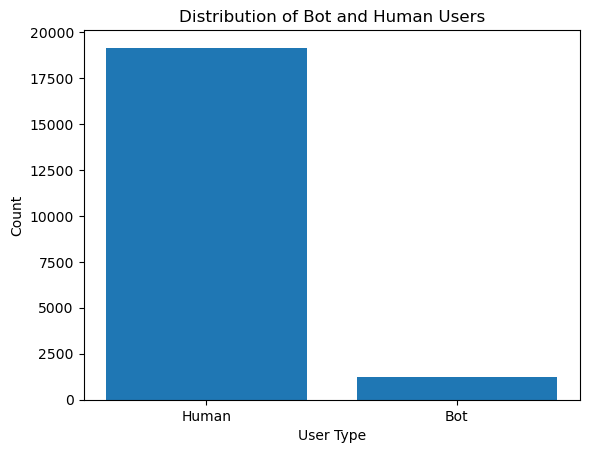

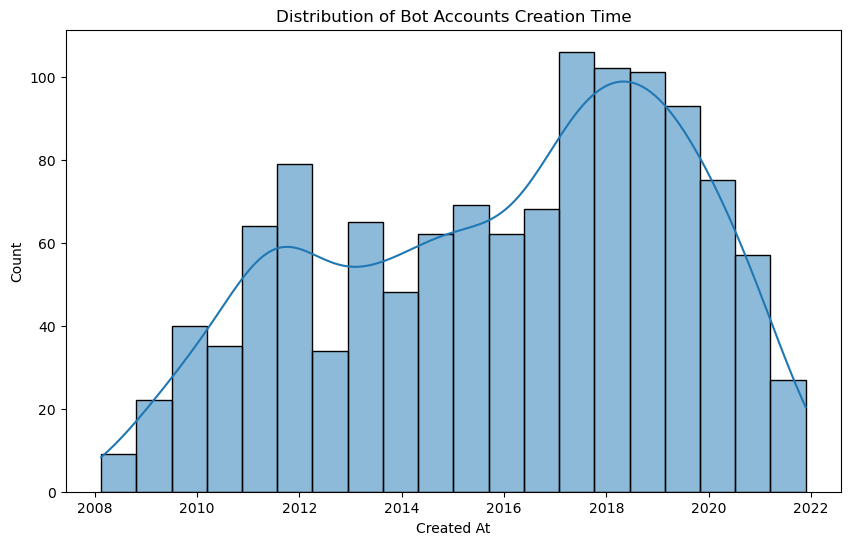

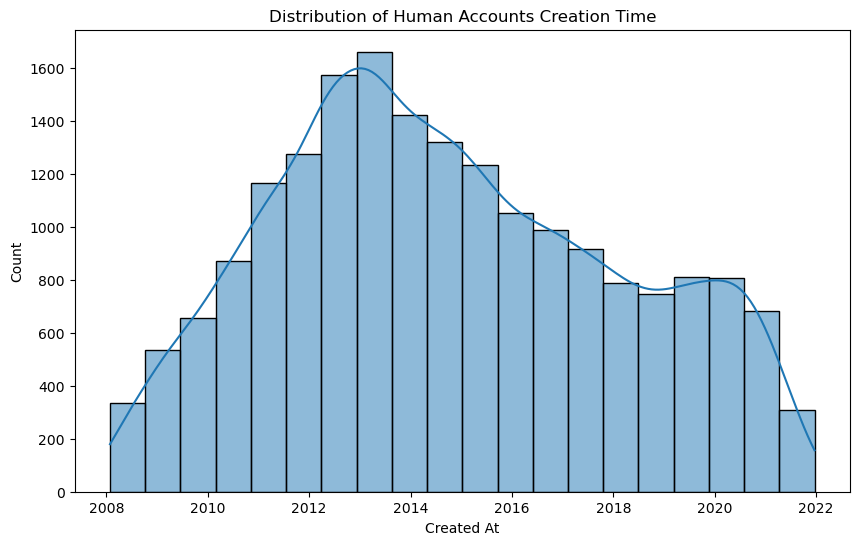

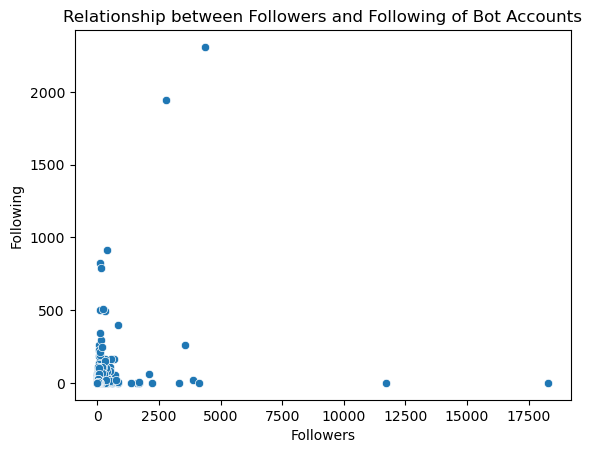

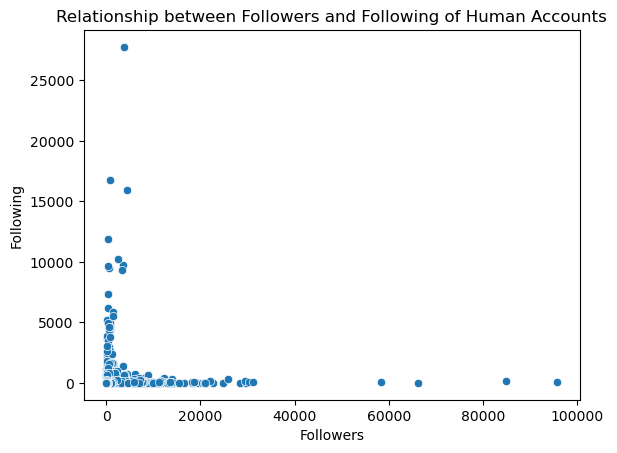

In [3]:
import pandas as pd
raw_data = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\大二\\大二上\\导论\\github_bot_raw_data.csv') 
columns = [
    'actor_id',  
    'label',  
    'login',  
    'id',  
    'node_id',  
    'avatar_url',  
    'gravatar_id',  
    'url',  
    'html_url',  
    'followers_url', 
    'following_url',  
    'gists_url',  
    'starred_url',  
    'subscriptions_url',  
    'organizations_url',  
    'repos_url',  
    'events_url', 
    'received_events_url', 
    'type',  
    'site_admin', 
    'name',  
    'company',  
    'blog',  
    'location',  
    'email',  
    'hireable', 
    'bio',  
    'twitter_username', 
    'public_repos',  
    'public_gists',  
    'followers',  
    'following',  
    'created_at', 
    'updated_at',  
]
data = raw_data[columns]

# 1. 删除重复数据，并输出去重前后的数据量
print("1.")
print("去重前数据量:", len(data))
data_unique = data.drop_duplicates()
print("去重后数据量:", len(data_unique))

# 2. 缺失值处理
print("2.")
# 首先，去掉 gravatar_id列，并查看各列的缺失值的情况
data_without_gravatar = data.drop('gravatar_id', axis=1)
print("去掉gravatar_id列后各列缺失值情况:")
print(data_without_gravatar.isnull().sum())

# 其次，将可转化成 boolean变量的列字段转化成 boolean变量，文本数据用空字符串填充空值
bool_columns = ['site_admin', 'hireable']
for col in bool_columns:
    data_without_gravatar[col] = data_without_gravatar[col].astype('bool')

text_columns = ['company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data_without_gravatar[col] = data_without_gravatar[col].fillna('')

# 最后，再次看各列有无缺失值
print("处理后各列缺失值情况:")
print(data_without_gravatar.isnull().sum())

# 3. 数据变换，将created_at、updated_at转为时间戳
print("3.")
data_without_gravatar['created_at'] = pd.to_datetime(data_without_gravatar['created_at'])
data_without_gravatar['created_at_timestamp'] = data_without_gravatar['created_at'].astype('int64') // 10**9

data_without_gravatar['updated_at'] = pd.to_datetime(data_without_gravatar['updated_at'])
data_without_gravatar['updated_at_timestamp'] = data_without_gravatar['updated_at'].astype('int64') // 10**9
print("成功将created_at、updated_at转为时间戳")
# 4. 数据可视化
print("4.")
import matplotlib.pyplot as plt
import seaborn as sns

# 4.1 可视化bot和hunman类型的情况
count_by_label = data_without_gravatar['label'].value_counts()
plt.bar(count_by_label.index, count_by_label.values)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of Bot and Human Users')
plt.show()

# 4.2 可视化bot类型账号的created_at情况
bot_data = data_without_gravatar[data_without_gravatar['label'] == 'Bot']
bot_created_at = bot_data['created_at']

plt.figure(figsize=(10, 6))
sns.histplot(bot_created_at, bins=20, kde=True)
plt.xlabel('Created At')
plt.ylabel('Count')
plt.title('Distribution of Bot Accounts Creation Time')
plt.show()

# 4.3 可视化human类型账号的created_at情况
human_data = data_without_gravatar[data_without_gravatar['label'] == 'Human']
human_created_at = human_data['created_at']

plt.figure(figsize=(10, 6))
sns.histplot(human_created_at, bins=20, kde=True)
plt.xlabel('Created At')
plt.ylabel('Count')
plt.title('Distribution of Human Accounts Creation Time')
plt.show()

# 4.4 可视化bot类型账号的followers和following情况
bot_followers_following = bot_data[['followers', 'following']]
sns.scatterplot(data=bot_followers_following, x='followers', y='following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.title('Relationship between Followers and Following of Bot Accounts')
plt.show()

# 4.5 可视化human类型账号的followers和following情况
human_followers_following = human_data[['followers', 'following']]
sns.scatterplot(data=human_followers_following, x='followers', y='following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.title('Relationship between Followers and Following of Human Accounts')
plt.show()


* 4.1 可视化bot和hunman类型的情况 
1. 选择柱状图的原因：直观地看到human和bot类型的数量对比。
2. 结果分析：从图中可以直接看出human类型数量约为19000，bot类型数量约为1000，human类型数量远多于bot类型数量。
3. 数据洞察：能帮助判断数据是否存在明显的偏向性，比如是否某种类型的账号占比过高。

* 4.2 可视化bot类型账号的created_at情况
1. 选择直方图的原因：适合展示数据的分布情况，能直观反映bot类型账号创建时间的分布规律。
2. 结果分析：通过直方图的形状，可以了解bot账号创建时间在2017-2020年最为集中，在2012年前后也较为集中。
3. 数据洞察：有助于分析bot账号的创建趋势，比如是否在某些特定时间有大量bot账号被创建。

* 4.3 可视化human类型账号的created_at情况
1. 选择直方图的原因：同4.2，可清晰展示human类型账号创建时间的分布特征。
2. 结果分析：观察直方图可得知human账号创建时间的集中程度和分布范围,比如在2011-2016年较集中，在2016-2021较平均。
3. 数据洞察：能辅助分析human账号的创建规律，例如是否存在创建高峰期等，比如2011-2016就是一个创建高峰期。

* 4.4 可视化bot类型账号的followers和following情况
1. 选择散点图的原因：可以直观地展示bot类型账号的followers和following之间的关系，是否存在某种关联趋势。
2. 结果分析：通过散点图的分布情况，可以看出bot账号的followers和following数量之间是否有明显的线性或非线性关系。
3. 数据洞察：有助于了解bot账号在社交互动方面的特点，比如是否存在一些bot账号虽然关注很多人但粉丝很少等情况

* 4.5 可视化human类型账号的followers和following情况
1. 选择散点图的原因：与4.4类似，用于呈现human类型账号的followers和following的关系。
2. 结果分析：观察散点图能发现human账号的followers和following数量之间的联系以及分布规律。
3. 数据洞察：可以帮助分析human账号在社交互动方面的特性，比如是否有部分human账号的粉丝和关注数量呈现特定的比例关系等。
